In [1]:
# Libraries we need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

## Training Data

In [2]:
df = pd.read_csv('MultipleTrainingData.csv')

In [3]:
feature1 = df['Size(sqft)'].to_numpy()
feature2 = df['Bedrooms'].to_numpy()
feature3 = df['Floors'].to_numpy()
feature4 = df['Ages'].to_numpy()
target   = df['Price'].to_numpy()

X_features = ['size(sqft)','bedrooms','floors','age']

In [4]:
X_train = np.stack((feature1, feature2, feature3, feature4), axis=-1)
y_train = target

In [5]:
# Check number of Features equal Targets
len(X_train) == len(y_train)

True

## Plot Each Feature individualy

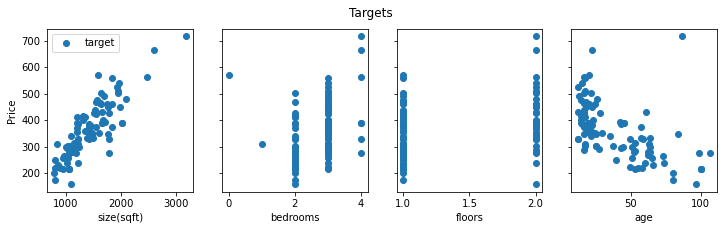

In [6]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Targets")
plt.show()

In [7]:
# inialize Parameters
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b_init = 785.1811367994083
print(f"w_init shape: {w_init.shape}")
print(f"b_init type: {type(b_init)}")

w_init shape: (4,)
b_init type: <class 'float'>


## Model
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $$ 

In [8]:
# Take single training example (Vector) and return target (Scalar).
def compute_model(X, w, b):
    return np.dot(X, w) + b

In [9]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = compute_model(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}, target: {y_train[0]}")

x_vec shape (4,), x_vec value: [1.24e+03 3.00e+00 1.00e+00 6.40e+01]
f_wb shape (), prediction: -417.6262870205919, target: 300.0


## Cost 
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

In [10]:
def compute_cost(X, y, w, b, model):
    m = len(X)
    return (1/(2*m)) * sum((model(X, w, b) - y)**2)   # Broadcasting

In [11]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init, compute_model)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 222302.2051743871


## Gradient Descent
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$

In [12]:
def compute_partial(X, y, w, b, model):
    m, n = X.shape
    dj_dw, dj_db = np.zeros(n), 0
    
    for i in range(m):
        dj_dw += (model(X[i], w, b) - y[i]) * X[i]  # vector
        dj_db += model(X[i], w, b) - y[i]           # scalar
        
    dj_dw /= m                                
    dj_db /= m                                
        
    return dj_db, dj_dw

In [13]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_partial(X_train, y_train, w_init, b_init, compute_model)
print(f'dj_dw at initial w,b: {tmp_dj_dw}')
print(f'dj_db at initial w,b: {tmp_dj_db}')

dj_dw at initial w,b: [ 1.45e+04 -1.02e+02  1.48e+00 -1.93e+04]
dj_db at initial w,b: -59.94362409927867


In [14]:
def compute_gradient(X, y, w_in, b_in, cost, partial, alpha, num_iters, model):
    J_history, p_history = [], []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = partial(X, y, w, b, model) 
        w -= alpha * dj_dw              
        b -= alpha * dj_db              

        if i<100000:      
            J_history.append(cost(X, y, w, b, model))
            p_history.append([w,b]) 
            
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:0.2f}   ")
      
    print("")
    print(f"b,w found by gradient descent: {p_history[-1][1]:0.2f},{p_history[-1][0]} ")
    print(f"Cost function: {J_history[-1]}")
    return w, b, J_history, p_history

In [15]:
initial_w = np.zeros_like(w_init)
initial_b = 100.

iterations = 10000
alpha = 3e-7


w_final, b_final, J_hist, P_hist = compute_gradient(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_partial, 
                                                    alpha, iterations, compute_model)

Iteration    0: Cost 6124.94   
Iteration 1000: Cost 1227.01   
Iteration 2000: Cost 1050.79   
Iteration 3000: Cost 948.93   
Iteration 4000: Cost 890.05   
Iteration 5000: Cost 856.01   
Iteration 6000: Cost 836.32   
Iteration 7000: Cost 824.92   
Iteration 8000: Cost 818.31   
Iteration 9000: Cost 814.48   

b,w found by gradient descent: 100.00,[ 0.22 -0.03 -0.03 -1.17] 
Cost function: 812.2440318290601


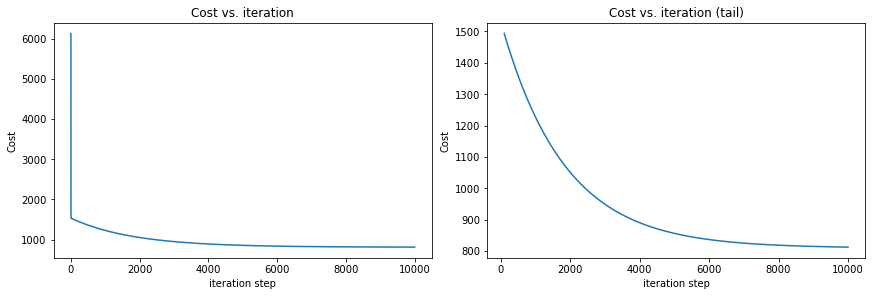

In [16]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [17]:
y_pred = np.dot(X_train, w_final) + b_final

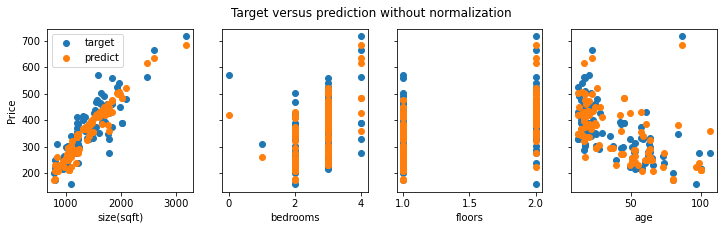

In [18]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Target versus prediction without normalization")
plt.show()

You can see that fitting size feature is bad

## z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2 
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [19]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)             
    sigma  = np.std(X, axis=0)                
    X_norm = (X - mu) / sigma      
    
    return X_norm

## Features before Z-Score Normalization

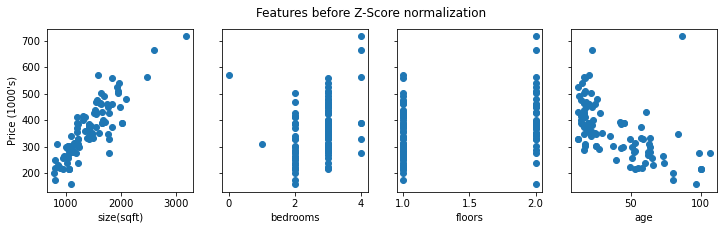

In [20]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
    
ax[0].set_ylabel("Price (1000's)")
fig.suptitle("Features before Z-Score normalization")
plt.show()

## Features after Z-Score Normalization

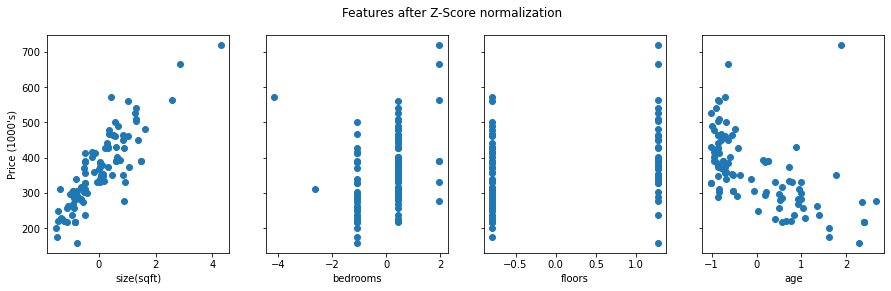

In [21]:
X_norm = zscore_normalize_features(X_train)  

fig,ax=plt.subplots(1, 4, figsize=(15, 4), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
    
ax[0].set_ylabel("Price (1000's)")
fig.suptitle("Features after Z-Score normalization")
plt.show()

## Applying Gradient Descent after Feature Scaling

In [22]:
initial_w = np.zeros_like(w_init)
initial_b = 0.  

iterations = 1000
alpha = 0.1 


w_norm, b_norm, J_hist, P_hist = compute_gradient(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_partial, 
                                                    alpha, iterations, compute_model)

Iteration    0: Cost 57616.38   
Iteration  100: Cost 218.34   
Iteration  200: Cost 216.44   
Iteration  300: Cost 216.44   
Iteration  400: Cost 216.44   
Iteration  500: Cost 216.44   
Iteration  600: Cost 216.44   
Iteration  700: Cost 216.44   
Iteration  800: Cost 216.44   
Iteration  900: Cost 216.44   

b,w found by gradient descent: 363.16,[110.69 -21.4  -32.7  -37.86] 
Cost function: 216.44200334449968


In [23]:
y_pred = compute_model(X_norm, w_norm, b_norm)

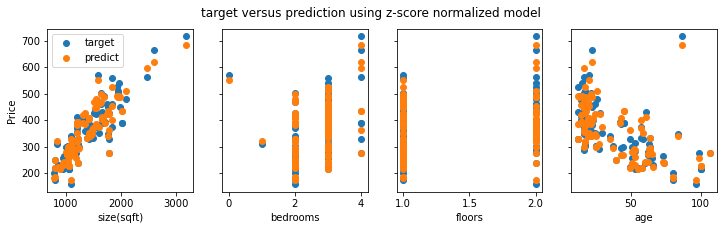

In [24]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
    ax[i].set_xlabel(X_features[i])
    
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

### We can notice that the fiiting is very good after Feature Scaling

# Using Scikit-Learn Library

In [25]:
# Libraries
from sklearn.linear_model import SGDRegressor   # SGD stands for Stochastic Gradient Descent
from sklearn.preprocessing import StandardScaler

In [26]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 43, number of weight updates: 4258.0


### Feature Scalling using Scikit learn

In [27]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.4e+03 4.0e+00 1.0e+00 9.5e+01]
Peak to Peak range by column in Normalized X:[5.84 6.14 2.06 3.69]


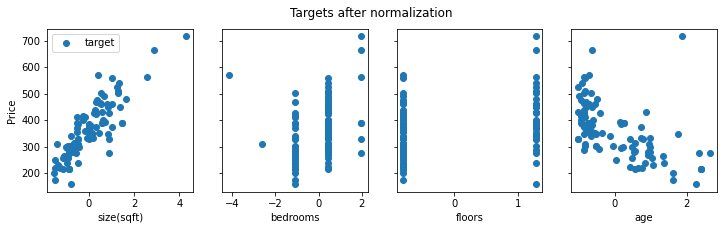

In [28]:
 fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Targets after normalization")
plt.show()

In [29]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 107, number of weight updates: 10594.0


In [30]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [109.94 -21.03 -32.29 -37.98], b:[363.16]


In [31]:
from sklearn.metrics import mean_squared_error

print(f"The cost Function: {mean_squared_error(y_train, y_pred):0.2f}")

The cost Function: 432.88


In [32]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm 
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"\nPrediction on training set:\n{y_pred[:4]}" )
print(f"\nTarget values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True

Prediction on training set:
[294.1  486.7  388.4  492.32]

Target values 
[300.  509.8 394.  540. ]


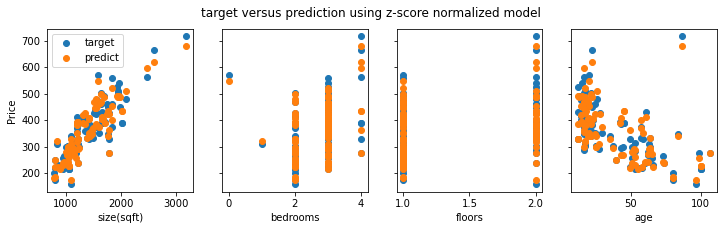

In [33]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

# Optimization with Regularization

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 $$ 

In [34]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    m = len(X)
    cost = (1/(2*m)) * sum((compute_model(X, w, b) - y)**2)   
    cost += sum((lambda_/(2*m)) * w**2)
    return cost 

In [35]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 

    m,n = X.shape          
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]
        
        dj_dw += err * X[i]               
        dj_db += err
        
    dj_dw /= m                                
    dj_db /= m   
    
    dj_dw += (lambda_/m) * w

    return dj_db, dj_dw

In [36]:
def compute_gradient(X, y, w_in, b_in, cost, partial, alpha, num_iters, model):
    J_history, p_history = [], []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = partial(X, y, w, b, 0.7) 
        w -= alpha * dj_dw              
        b -= alpha * dj_db              

        if i<100000:      
            J_history.append(cost(X, y, w, b, model))
            p_history.append([w,b]) 
            
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    print("")
    print(f"b,w found by gradient descent: {p_history[-1][1]:0.2f},{p_history[-1][0]} ")
    print(f"Cost function: {J_history[-1]:0.2f}")
    
    return w, b, J_history, p_history

In [37]:
initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 1000
alpha = 0.05


w_final, b_final, J_hist, P_hist = compute_gradient(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient_linear_reg, 
                                                    alpha, iterations, compute_model)

Iteration    0: Cost 64297.57   
Iteration  100: Cost   286.78   
Iteration  200: Cost   221.36   
Iteration  300: Cost   217.78   
Iteration  400: Cost   217.38   
Iteration  500: Cost   217.32   
Iteration  600: Cost   217.31   
Iteration  700: Cost   217.31   
Iteration  800: Cost   217.31   
Iteration  900: Cost   217.31   

b,w found by gradient descent: 363.16,[108.89 -20.64 -31.68 -37.83] 
Cost function: 217.31


In [38]:
y_pred = compute_model(X_norm, w_final, b_final)

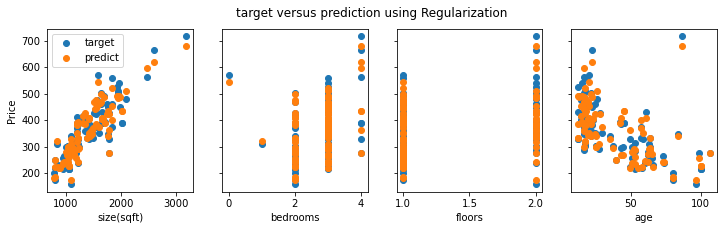

In [39]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();

fig.suptitle("target versus prediction using Regularization")
plt.show()